# Churn Classification

https://www.kaggle.com/shubh0799/churn-modelling

## Import Basic Libraries

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

## Load Dataset 

In [2]:
# load dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# describe simple statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
# checking null 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# check duplicated data
df.duplicated().sum()

0

0    7963
1    2037
Name: Exited, dtype: int64


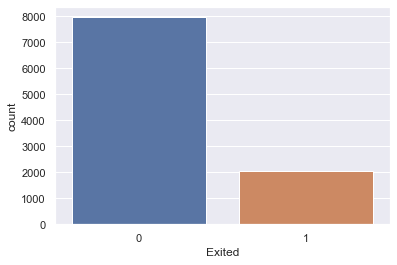

In [7]:
# checking the target column
print(df['Exited'].value_counts())
sns.countplot(x='Exited', data=df)

from visualization above we can see that we have inbalance dataset. The amount of Exited people is higher than No-Exited

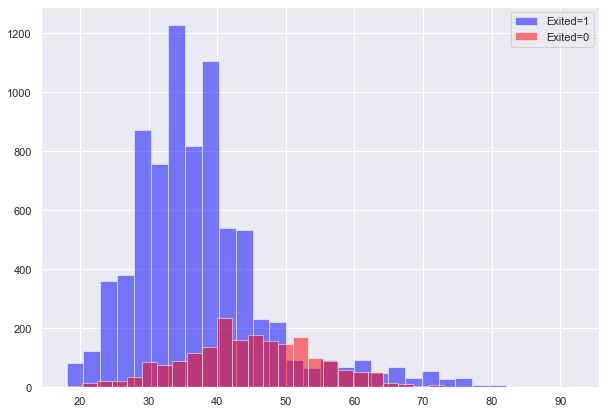

In [8]:
# spliting by age
plt.figure(figsize=(10,7))
df[df['Exited'] == 0]['Age'].hist(color='blue', alpha=0.5, bins=30, label='Exited=1')
df[df['Exited'] == 1]['Age'].hist(color='red', alpha=0.5, bins=30, label='Exited=0')
plt.legend()
plt.show()

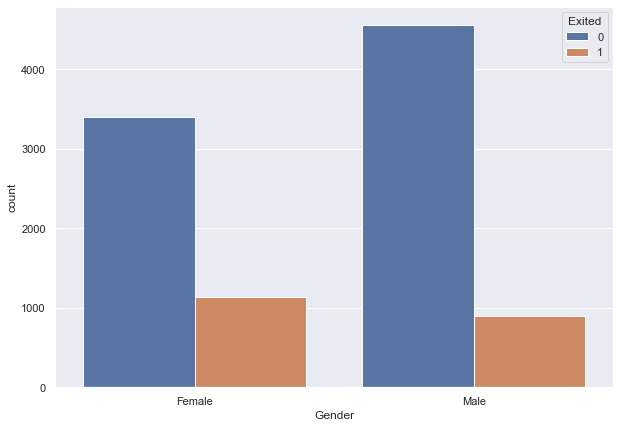

In [9]:
# spliting by gender
plt.figure(figsize=(10,7))
sns.countplot(x='Gender', hue='Exited', data=df)

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# drop unused column
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Drop unused column like RowNumber, CustomerId, and Surname. Those columns will not help us in the classification process

In [13]:
df_filtered = df.copy()

In [14]:
df_filtered.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\gigas\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


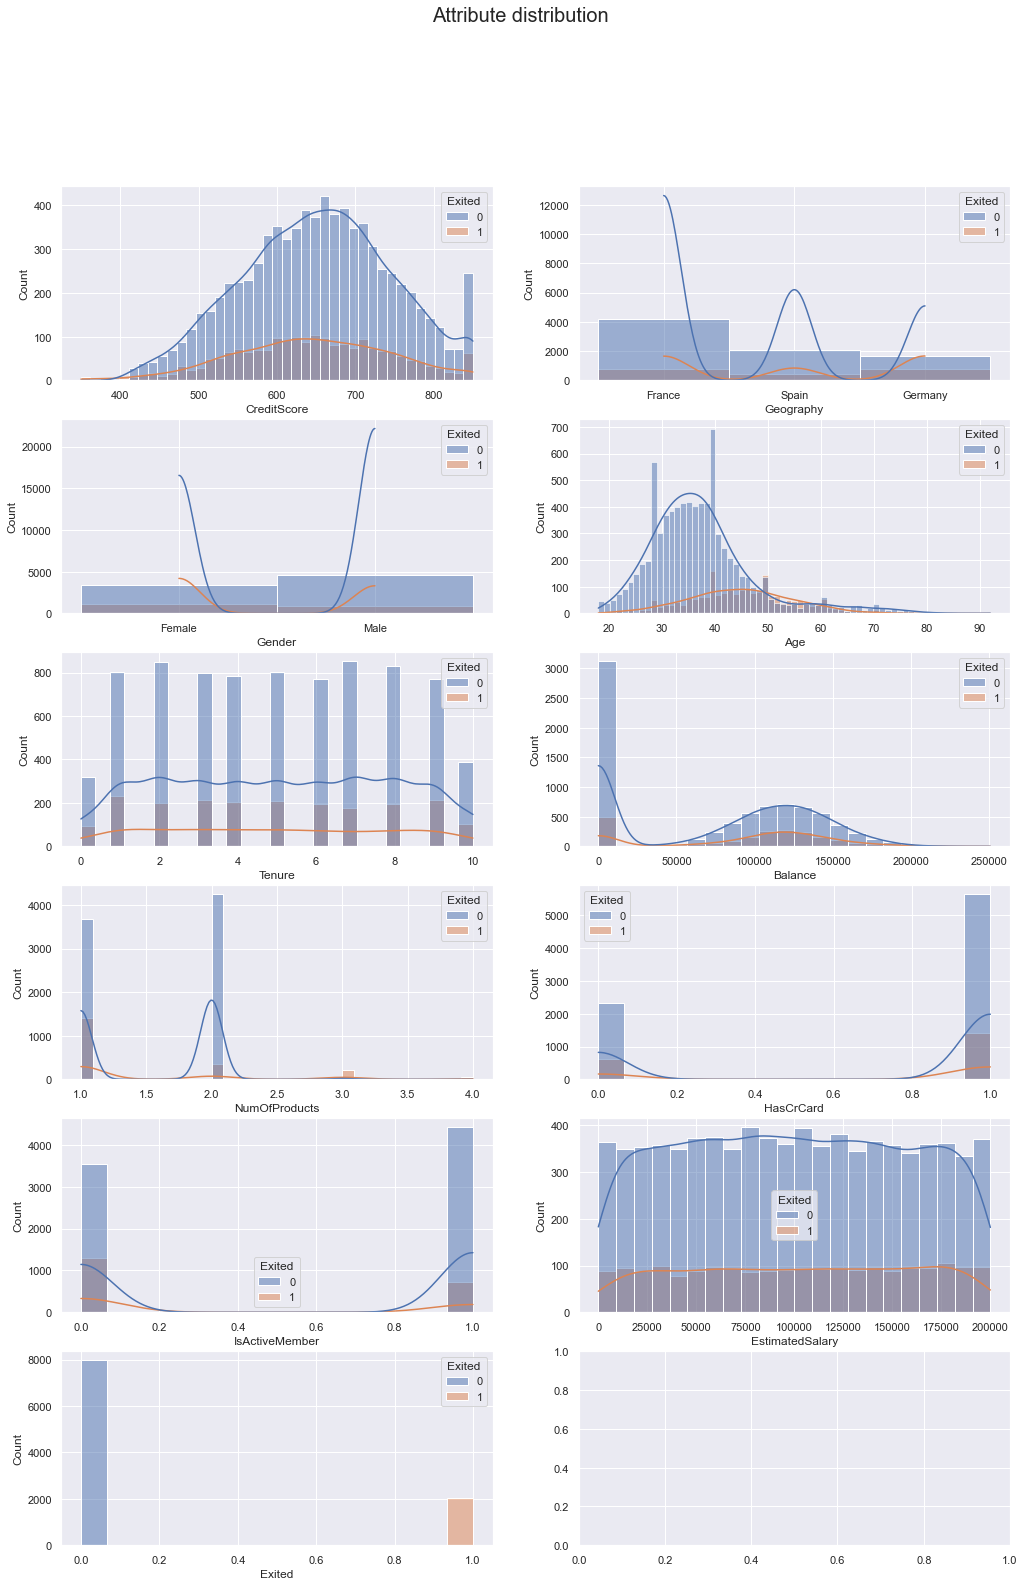

In [15]:
fig, axs = plt.subplots(6, 2, figsize=(17, 25))
fig.suptitle("Attribute distribution", fontsize=20)
for idx, col in enumerate(df_filtered.columns):
  sns.histplot(data=df_filtered, x=col, hue='Exited', ax=axs.flat[idx], kde=True)

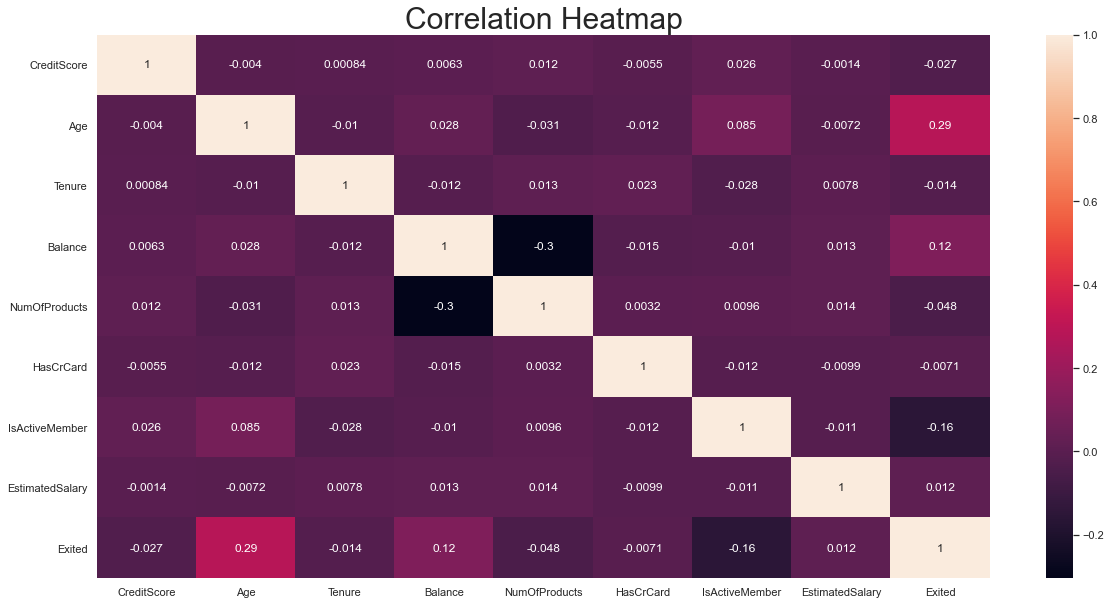

In [16]:
plt.figure(figsize=(20,10))
plt.title("Correlation Heatmap", fontsize=30)
sns.heatmap(df_filtered.corr(), annot=True)

## Preprocessing Data

In [17]:
# get dummies for geography and gender column
# make it from categorical string into number
geography = pd.get_dummies(df_filtered['Geography'], drop_first=True)
male = pd.get_dummies(df_filtered['Gender'], drop_first=True)

In [18]:
df_filtered = pd.concat([df_filtered, geography, male], axis=1)

In [19]:
df_filtered.drop(['Geography', 'Gender'],axis=1, inplace=True)

In [20]:
df_filtered.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


For the Geography and Gender columns we can convert them into numbers that represent each value in that column. The Geography column will change to two columns as Spain and Germany. The Gender column will change to the Male column.

In [21]:
# oversampling minority class
from sklearn.utils import resample

# Separate majority and minority classes
df_filtered_majority = df_filtered[df_filtered.Exited==0]
df_filtered_minority = df_filtered[df_filtered.Exited==1]
 
# Upsample minority class
df_filtered_minority_upsampled = resample(df_filtered_minority, 
                                 replace=True,
                                 n_samples=7963,
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_filtered_upsampled = pd.concat([df_filtered_majority, df_filtered_minority_upsampled])
 
# Display new class counts
df_filtered_upsampled.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

To make the data balance we use Oversampling with resample methode.

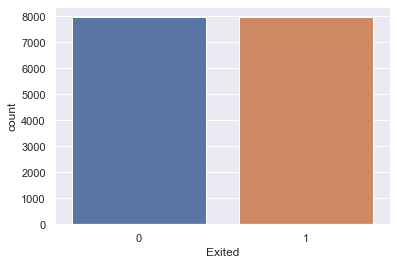

In [22]:
sns.countplot(x='Exited', data=df_filtered_upsampled)

In [23]:
df_filtered_upsampled.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [24]:
df_filtered_minority_upsampled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
7445,516,45,4,0.00,1,1,0,95273.73,1,0,0,0
6729,454,50,10,92895.56,1,1,0,154344.00,1,1,0,0
6812,576,63,3,148843.56,1,1,0,69414.13,1,1,0,1
6497,669,50,9,201009.64,1,1,0,158032.50,1,0,0,1
9858,507,40,3,120105.43,1,1,0,92075.01,1,1,0,1


## Modelling 

In [25]:
X = df_filtered_upsampled[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Germany', 'Spain','Male']]
y = df_filtered_upsampled['Exited']

In [26]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1


In [27]:
y.head()

1    0
3    0
4    0
6    0
8    0
Name: Exited, dtype: int64

In [28]:
# Split Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# it will print confusion matrix
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = confusion_matrix(y_test, result)
  plt.figure(figsize=(12,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### Decision Tree 

In [30]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
dtc.score(X_test, y_test)

0.9039347007115948

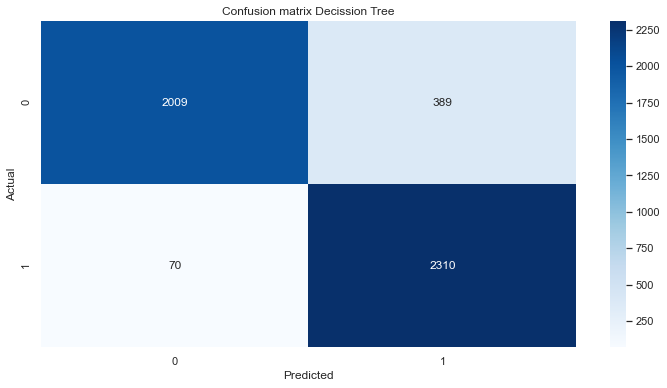

In [32]:
result_dtc = dtc.predict(X_test)
print_conf(y_test, result_dtc, [0, 1], title="Confusion matrix Decission Tree")

In [33]:
print(classification_report(y_test, result_dtc))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2398
           1       0.86      0.97      0.91      2380

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



### Naive Bayes

In [34]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [35]:
gnb.score(X_test, y_test)

0.6929677689409794

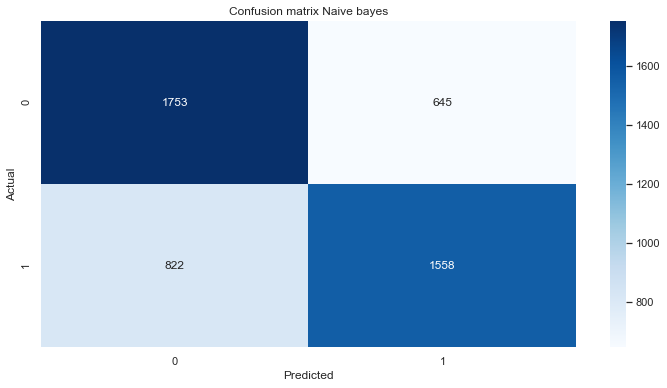

In [36]:
result_gnb = gnb.predict(X_test)
print_conf(y_test, result_gnb, [0, 1], title="Confusion matrix Naive bayes")

In [37]:
print(classification_report(y_test, result_gnb))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      2398
           1       0.71      0.65      0.68      2380

    accuracy                           0.69      4778
   macro avg       0.69      0.69      0.69      4778
weighted avg       0.69      0.69      0.69      4778



### Random Forest 

In [38]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [39]:
rfc.score(X_test, y_test)

0.943281707827543

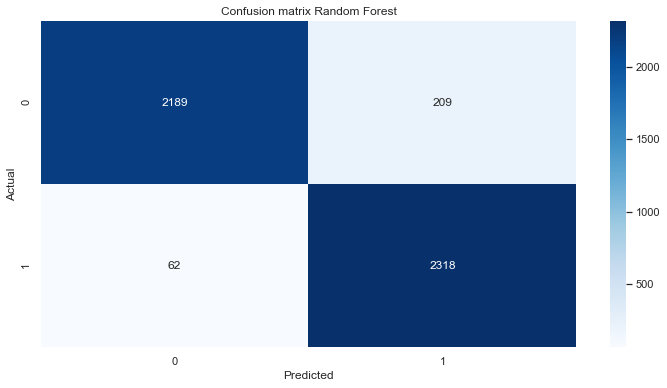

In [40]:
result_rfc = rfc.predict(X_test)
print_conf(y_test, result_rfc, [0, 1], title="Confusion matrix Random Forest")

In [41]:
print(classification_report(y_test, result_rfc))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2398
           1       0.92      0.97      0.94      2380

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



### XGBOOST with RandomizedSearchCV

In [58]:
# xgboost
from sklearn.model_selection import RandomizedSearchCV
import xgboost

xgb = xgboost.XGBClassifier()

# input parameters
params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# find the best parameters using RandomizeSearchCV scoring with roc_auc
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1, verbose=0)

# fit the X and Y to the random_search variable
random_search.fit(X, y)

C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=N

Search the best parameters in xgboost using randomizedsearch cv 

In [60]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
random_search.best_params_

{'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.3}

In [62]:
from numpy import nan

In [63]:
xgb = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

change the parameters of xgb with the result from best_params_

In [64]:
xgb.fit(X_train, y_train)

[12:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
xgb.score(X_test, y_test)

0.9049811636668061

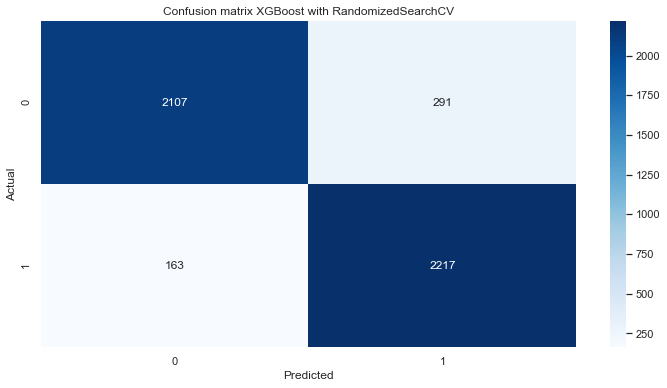

In [66]:
result_xgb = xgb.predict(X_test)
print_conf(y_test, result_xgb, [0, 1], title="Confusion matrix XGBoost with RandomizedSearchCV")

In [67]:
print(classification_report(y_test, result_xgb))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2398
           1       0.88      0.93      0.91      2380

    accuracy                           0.90      4778
   macro avg       0.91      0.91      0.90      4778
weighted avg       0.91      0.90      0.90      4778



# K Fold Cross Validation

In [52]:
# Cross Validation K Fold CV
from sklearn.model_selection import cross_val_score

In [68]:
# Decision Tree
score_dtc = cross_val_score(dtc, X, y, cv=10)

# Naive Bayes
score_gnb = cross_val_score(gnb, X, y, cv=10)

# Random Forest 
score_rfc = cross_val_score(rfc, X, y, cv=10)

# xgboost
score_xgb = cross_val_score(xgb, X, y, cv=10)

C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [69]:
print('Decision Tree: ', score_dtc)
print('Mean Decision Tree: ', score_dtc.mean())
print('Standard Deviation Decision Tree: ', score_dtc.std())
print('\n')
print('Naive Bayes: ', score_gnb)
print('Mean Naive Bayes: ', score_gnb.mean())
print('Standard Deviation Naive Bayes: ', score_gnb.std())
print('\n')
print(' Forest: ', score_rfc)
print('Mean Random Forest: ', score_rfc.mean())
print('Standard Deviation Random Forest: ', score_rfc.std())
print('\n')
print('XGBOOST: ', score_xgb)
print('Mean XGBOOST: ', score_xgb.mean())
print('Standard Deviation XGBOOST: ', score_xgb.std())

Decision Tree:  [0.92278719 0.93408663 0.91650973 0.92906466 0.92655367 0.92655367
 0.9258794  0.92462312 0.92211055 0.91959799]
Mean Decision Tree:  0.9247766610831937
Standard Deviation Decision Tree:  0.004678081398925244


Naive Bayes:  [0.69491525 0.69052103 0.68675455 0.69993723 0.69742624 0.71939736
 0.68969849 0.68718593 0.68844221 0.7129397 ]
Mean Naive Bayes:  0.6967217995186227
Standard Deviation Naive Bayes:  0.010667272765954047


 Forest:  [0.95103578 0.96233522 0.94915254 0.96610169 0.9566855  0.96107972
 0.95603015 0.95979899 0.96105528 0.95540201]
Mean Random Forest:  0.9578676890415669
Standard Deviation Random Forest:  0.004954270000469169


XGBOOST:  [0.91211551 0.91713748 0.89767734 0.92090395 0.90960452 0.91588198
 0.91708543 0.90452261 0.91520101 0.90640704]
Mean XGBOOST:  0.9116536858807534
Standard Deviation XGBOOST:  0.006735988530896367


Cross validating with the K Folds models showed that the accuracy values were in fact not arbitary and proofed that both models are performing very well.

Scikit-Learn RFC showed a higher mean and higher standard deviation than the XGBoost.

A high mean corresponds to a more stable performance and a low standard deviation corresponds to smaller range of results.

## Stratified Cross Validation 

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

skf = StratifiedKFold(n_splits=10)

skf.get_n_splits(X, y)

accuracy_dtc = []
accuracy_gnb = []
accuracy_rfc = []
accuracy_xgb = []

for train_index, test_index in skf.split(X, y):
    print("Train: ", train_index, "Test: ", test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    
    dtc.fit(X1_train, y1_train)
    gnb.fit(X1_train, y1_train)
    rfc.fit(X1_train, y1_train)
    xgb.fit(X1_train, y1_train)
    
    prediction_skf_dtc = dtc.predict(X1_test)
    prediction_skf_gnb = gnb.predict(X1_test)
    prediction_skf_rfc = rfc.predict(X1_test)
    prediction_skf_xgb = xgb.predict(X1_test)
    
    score_skf_dtc = metrics.accuracy_score(y1_test, prediction_skf_dtc)
    score_skf_gnb = metrics.accuracy_score(y1_test, prediction_skf_gnb)
    score_skf_rfc = metrics.accuracy_score(y1_test, prediction_skf_rfc)
    score_skf_xgb = metrics.accuracy_score(y1_test, prediction_skf_xgb)
    
    accuracy_dtc.append(score_skf_dtc)
    accuracy_gnb.append(score_skf_gnb)
    accuracy_rfc.append(score_skf_rfc)
    accuracy_xgb.append(score_skf_xgb)
    

Train:  [  797   798   799 ... 15923 15924 15925] Test:  [   0    1    2 ... 8756 8757 8758]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 797  798  799 ... 9552 9553 9554]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 1594  1595  1596 ... 10348 10349 10350]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 2391  2392  2393 ... 11145 11146 11147]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 3187  3188  3189 ... 11942 11943 11944]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 3983  3984  3985 ... 12739 12740 12741]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 4779  4780  4781 ... 13535 13536 13537]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 5575  5576  5577 ... 14331 14332 14333]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15923 15924 15925] Test:  [ 6371  6372  6373 ... 15127 15128 15129]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train:  [    0     1     2 ... 15127 15128 15129] Test:  [ 7167  7168  7169 ... 15923 15924 15925]


C:\Users\gigas\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
print("Decision Tree")
print(accuracy_dtc)
print("Mean: ",np.mean(accuracy_dtc))
print("STD: ",np.std(accuracy_dtc))

Decision Tree
[0.9227871939736346, 0.9322033898305084, 0.9158819836785939, 0.928436911487759, 0.928436911487759, 0.9271814187068425, 0.9277638190954773, 0.9246231155778895, 0.9214824120603015, 0.9189698492462312]
Mean:  0.9247767005144997
STD:  0.004736297290147238


In [81]:
print("Naive Bayes")
print(accuracy_gnb)
print("Mean: ",np.mean(accuracy_gnb))
print("STD: ",np.std(accuracy_gnb))

Naive Bayes
[0.6949152542372882, 0.6905210295040803, 0.6867545511613308, 0.6999372253609542, 0.6974262397991211, 0.71939736346516, 0.6896984924623115, 0.6871859296482412, 0.6884422110552764, 0.7129396984924623]
Mean:  0.6967217995186227
STD:  0.010667272765954047


In [82]:
print("Random Forest")
print(accuracy_rfc)
print("Mean: ",np.mean(accuracy_rfc))
print("STD: ",np.std(accuracy_rfc))

Random Forest
[0.9504080351537979, 0.9648462021343377, 0.9491525423728814, 0.9686126804770873, 0.9554300062774639, 0.9579409918392969, 0.960427135678392, 0.9579145728643216, 0.9616834170854272, 0.957286432160804]
Mean:  0.958370201604381
STD:  0.0056624004676798885


In [83]:
print("XGBOOST")
print(accuracy_xgb)
print("Mean: ",np.mean(accuracy_xgb))
print("STD: ",np.std(accuracy_xgb))

XGBOOST
[0.9121155053358443, 0.9171374764595104, 0.8976773383553045, 0.9209039548022598, 0.9096045197740112, 0.9158819836785939, 0.9170854271356784, 0.9045226130653267, 0.9152010050251256, 0.9064070351758794]
Mean:  0.9116536858807534
STD:  0.006735988530896367


Cross validating with the Stratified models showed that the accuracy values were in fact not arbitary and proofed that both models are performing very well.

Scikit-Learn RFC showed a higher mean and higher standard deviation than the XGBoost.

A high mean corresponds to a more stable performance and a low standard deviation corresponds to smaller range of results.

# Feature Importance Decision Tree

Decision Trees have the unique property of being able to order features by their ability to split between the classes.

We will now visualize the features and their splitting ability.

In [55]:
importances = pd.DataFrame({
    'Feature': df_filtered_upsampled.drop('Exited', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
NumOfProducts,0.264444
IsActiveMember,0.194026
Age,0.143778
Germany,0.114697
Male,0.060013
Balance,0.057888
Spain,0.044432
EstimatedSalary,0.034734
CreditScore,0.032534


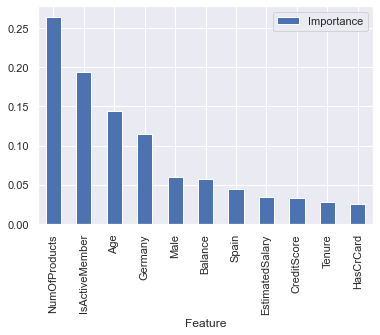

In [56]:
importances.plot.bar()